In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [2]:
train_labels[0]

1

In [3]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i,sequence in enumerate(sequences):
    for j in sequence:
      results[i,j] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [5]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])#binary

In [7]:
model.compile(optimizer = "rmsprop",
              loss= "binary_crossentropy",
              metrics = ["accuracy"])

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))
history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 [==============================] - 4s 114ms/step - loss: 0.4913 - accuracy: 0.7934 - val_loss: 0.3706 - val_accuracy: 0.8664
Epoch 2/20
30/30 [==============================] - 2s 62ms/step - loss: 0.2974 - accuracy: 0.8960 - val_loss: 0.2963 - val_accuracy: 0.8834
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2193 - accuracy: 0.9235 - val_loss: 0.2959 - val_accuracy: 0.8780
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1715 - accuracy: 0.9396 - val_loss: 0.2807 - val_accuracy: 0.8865
Epoch 5/20
30/30 [==============================] - 1s 47ms/step - loss: 0.1419 - accuracy: 0.9517 - val_loss: 0.3015 - val_accuracy: 0.8809
Epoch 6/20
30/30 [==============================] - 2s 52ms/step - loss: 0.1105 - accuracy: 0.9637 - val_loss: 0.3177 - val_accuracy: 0.8826
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0942 - accuracy: 0.9694 - val_loss: 0.3707 - val_accuracy: 0.8735
Epoch 8/20
3

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

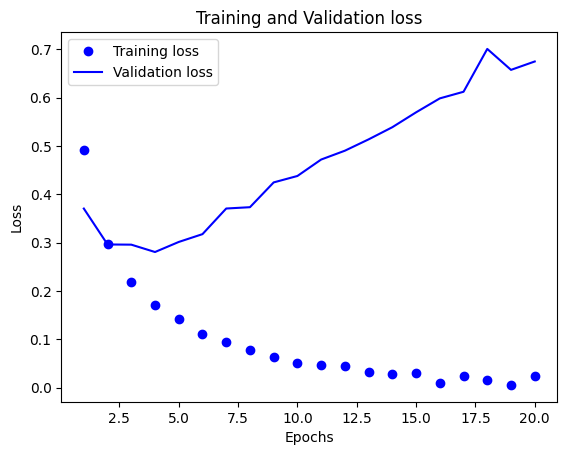

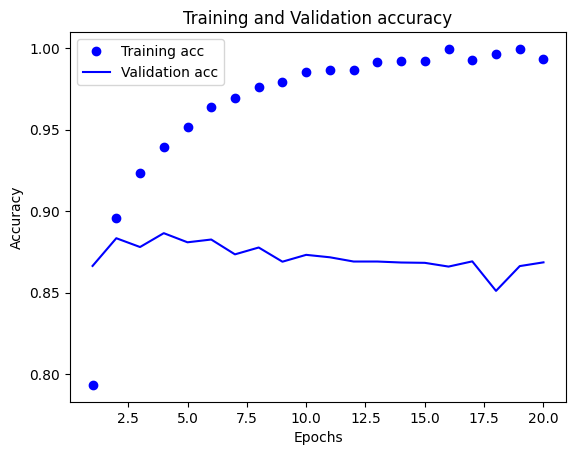

In [10]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label = "Training loss")
plt.plot(epochs, val_loss_values, "b", label = "Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label = "Training acc")
plt.plot(epochs, val_acc, "b", label = "Validation acc")
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [11]:
model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer = "rmsprop",
              loss= "binary_crossentropy",
              metrics = ["accuracy"])

history = model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 29ms/step - loss: 0.4335 - accuracy: 0.8219
Epoch 2/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2489 - accuracy: 0.9080
Epoch 3/4
49/49 [==============================] - 1s 29ms/step - loss: 0.1913 - accuracy: 0.9290
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.3095 - accuracy: 0.8804


In [12]:
results

[0.3095249831676483, 0.8804399967193604]

In [13]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.11104548],
       [0.99831784],
       [0.7303794 ],
       ...,
       [0.08654853],
       [0.05527806],
       [0.8360769 ]], dtype=float32)